# Vision & Telemetry Fundamentals
## Introduction to Image Processing and Real-time Data Handling

Welcome! In this workshop, you'll learn the fundamentals of computer vision and real-time data processing. These concepts are essential for robotics, autonomous systems, and real-time applications.

### What You'll Learn:
1. **Image Filters** - Smoothing, blurring, and noise reduction
2. **Transformations** - Rotating, scaling, and manipulating images
3. **Edge Detection** - Finding boundaries and features in images
4. **Back Pressure** - Managing data flow in real-time systems
5. **Telemetry** - Collecting and monitoring system data


## Setup: Installing Required Libraries

First, we need to install the libraries we'll use:
- **OpenCV** (`cv2`): The main computer vision library
- **NumPy**: For numerical operations and array handling
- **Matplotlib**: For displaying images and plots

In [1]:
# Install required packages
!pip install opencv-python numpy matplotlib pillow

  Using cached opencv_python-4.12.0.88-cp37-abi3-macosx_13_0_arm64.whl.metadata (19 kB)
  Using cached numpy-2.2.6-cp313-cp313-macosx_14_0_arm64.whl.metadata (62 kB)
Using cached opencv_python-4.12.0.88-cp37-abi3-macosx_13_0_arm64.whl (37.9 MB)
Using cached numpy-2.2.6-cp313-cp313-macosx_14_0_arm64.whl (5.1 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.4
    Uninstalling numpy-2.3.4:
      Successfully uninstalled numpy-2.3.4
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [opencv-python]0m [opencv-python]

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [2]:
# Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import time
from collections import deque

# Configure matplotlib for inline display
plt.rcParams['figure.figsize'] = (12, 8)

print("✓ All libraries imported successfully!")
print(f"OpenCV version: {cv2.__version__}")

✓ All libraries imported successfully!
OpenCV version: 4.12.0


## Helper Function: Display Images

Let's create a helper function to display images nicely in our notebook.

In [3]:
def display_image(image, title="Image", cmap=None):
    """
    Display an image using matplotlib.
    
    Args:
        image: The image to display (numpy array)
        title: Title for the image
        cmap: Color map (use 'gray' for grayscale images)
    """
    plt.figure(figsize=(10, 6))
    if len(image.shape) == 3:  # Color image
        # OpenCV uses BGR, convert to RGB for display
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else:  # Grayscale
        plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

def display_images_side_by_side(images, titles):
    """
    Display multiple images side by side.
    
    Args:
        images: List of images to display
        titles: List of titles for each image
    """
    fig, axes = plt.subplots(1, len(images), figsize=(15, 5))
    if len(images) == 1:
        axes = [axes]
    
    for idx, (img, title) in enumerate(zip(images, titles)):
        if len(img.shape) == 3:
            axes[idx].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        else:
            axes[idx].imshow(img, cmap='gray')
        axes[idx].set_title(title)
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()

print("✓ Helper functions defined!")

✓ Helper functions defined!


## Creating a Test Image

Since we might not have a sample image yet, let's create one programmatically to experiment with!

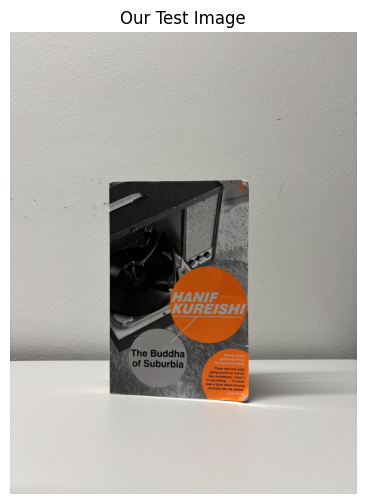

Image shape: (5712, 4284, 3) (Height x Width x Channels)


In [28]:
# Create a simple test image with geometric shapes
test_image = cv2.imread('Images/left_book.jpg')

display_image(test_image, "Our Test Image")
print(f"Image shape: {test_image.shape} (Height x Width x Channels)")

---
# Part 1: Image Filters

## What are Image Filters?

Image filters are operations that modify pixels based on their neighborhood. They're used for:
- **Noise reduction** - Removing unwanted random variations
- **Smoothing** - Making images less sharp/detailed
- **Sharpening** - Enhancing edges and details

### How Filters Work
Filters use a **kernel** (small matrix) that slides over the image, computing a weighted sum of pixel values.

Let's explore different types of filters!

## 1.1 Blur Filters

Blurring smooths out an image by averaging pixel values with their neighbors.

/var/folders/by/m_9mwd4x2s9d7kt2gf48gq500000gn/T/ipykernel_64786/3075479481.py:40: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/maxbyng-maddick/.venvs/torch-env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


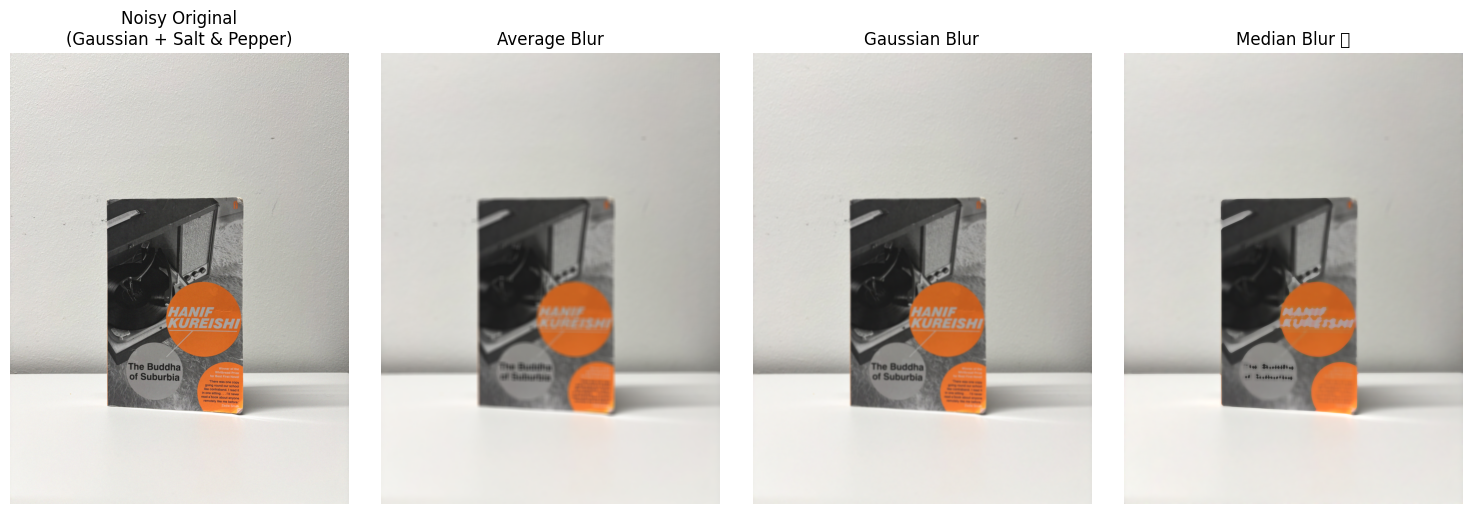

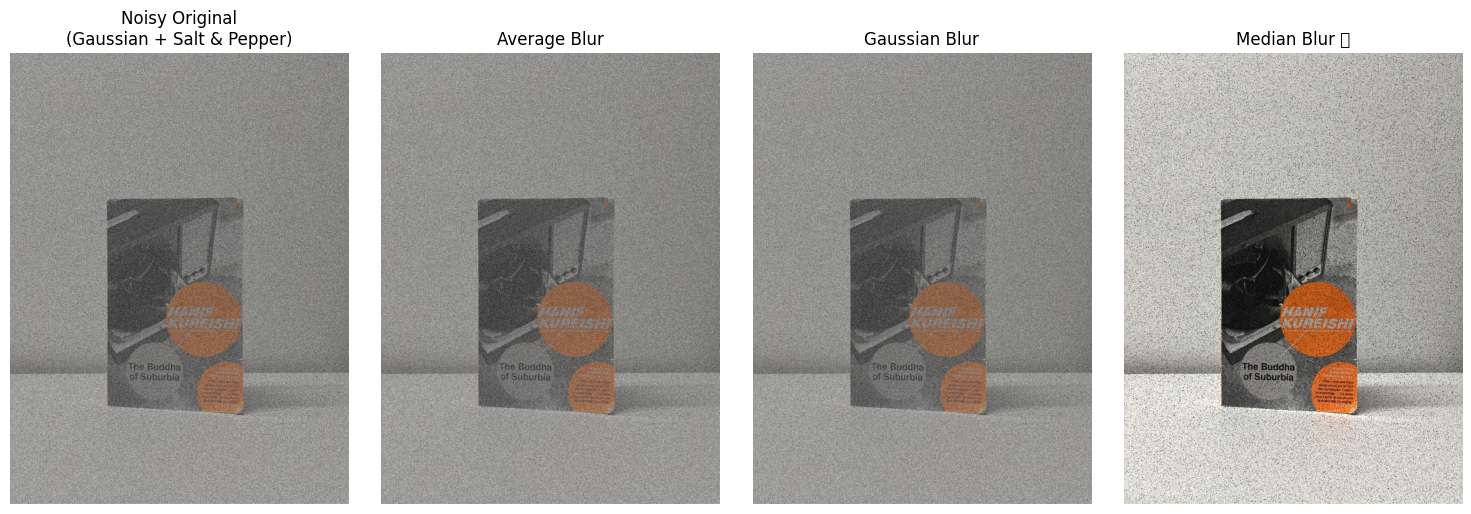

 Notice how gaussian blur preserves edges much better
 Notice how median blur removes salt & pepper noise much better
   The white and black speckles are almost completely gone.


In [ ]:
noisy_image = test_image.copy()

# Add Gaussian noise (random variations)
gaussian_noise = np.random.randint(0, 50, test_image.shape, dtype=np.uint8)
noisy_image = cv2.add(noisy_image, gaussian_noise)
noisy_image_sp = noisy_image.copy()
# Add salt and pepper noise (random white and black pixels)

salt_pepper_prob = 0.3  # 30% of pixels will be affected

# Salt (white pixels)
num_salt = np.ceil(salt_pepper_prob * noisy_image.size * 0.5)
coords = [np.random.randint(0, i - 1, int(num_salt)) for i in noisy_image.shape]
noisy_image_sp[coords[0], coords[1], :] = 255

# Pepper (black pixels)
num_pepper = np.ceil(salt_pepper_prob * noisy_image.size * 0.5)
coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in noisy_image.shape]
noisy_image_sp[coords[0], coords[1], :] = 0

# Apply different blur filters
# 1. Average Blur - Simple averaging of pixels
avg_blur_sp = cv2.blur(noisy_image_sp, (5, 5))
avg_blur = cv2.blur(noisy_image, (55, 55))

# 2. Gaussian Blur - Weighted average (center pixels matter more)
gaussian_blur_sp = cv2.GaussianBlur(noisy_image_sp, (5, 5), 0)
gaussian_blur = cv2.GaussianBlur(noisy_image, (55, 55), 0)

# 3. Median Blur - Uses median value (BEST for salt-and-pepper noise!)
median_blur_sp = cv2.medianBlur(noisy_image_sp, 5)
median_blur = cv2.medianBlur(noisy_image, 55)

# Display results
display_images_side_by_side(
    [noisy_image, avg_blur, gaussian_blur, median_blur],
    ['Noisy Original\n(Gaussian noise)', 'Average Blur', 'Gaussian Blur', 'Median Blur']
)

display_images_side_by_side(
    [noisy_image_sp, avg_blur_sp, gaussian_blur_sp, median_blur_sp],
    ['Noisy Original\n(Gaussian noise + Salt & Pepper)', 'Average Blur', 'Gaussian Blur', 'Median Blur']
)

print("Notice how gaussian blur preserves edges much better than average blur.")
print("Notice how median blur removes salt & pepper noise much better.")
print("The white and black speckles are almost completely gone.")

### Key Takeaway
- **Average Blur**: Simple but can blur edges too much
- **Gaussian Blur**: Best for natural smoothing
- **Median Blur**: Excellent for removing "salt and pepper" noise

## 1.2 Sharpening Filters

Sharpening enhances edges and fine details in an image.

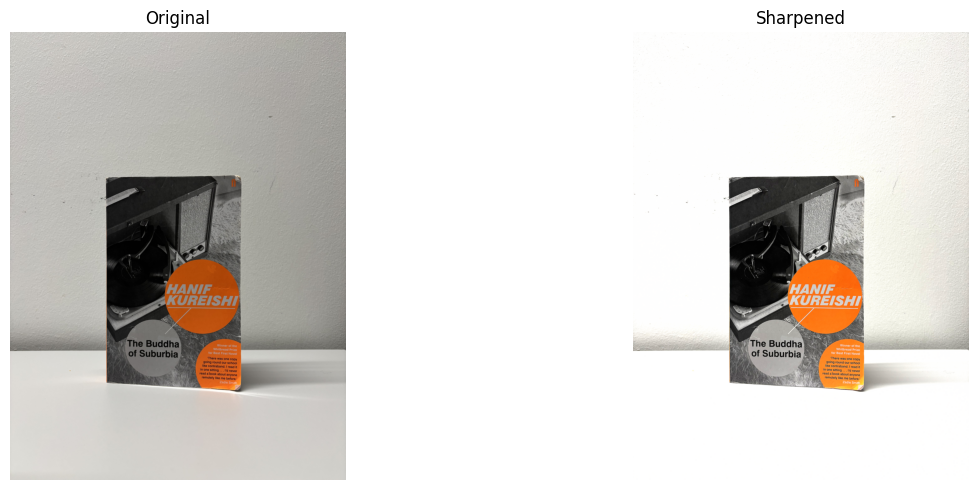

Sharpening kernel:
[[-1.  -1.  -1. ]
 [-1.   9.5 -1. ]
 [-1.  -1.  -1. ]]


In [83]:
# Create a sharpening kernel
sharpening_kernel = np.array([[-1, -1, -1],
                               [-1,  9.5, -1],
                               [-1, -1, -1]])

# Apply the kernel
sharpened = cv2.filter2D(test_image, -1, sharpening_kernel)

display_images_side_by_side(
    [test_image, sharpened],
    ['Original', 'Sharpened']
)

print("Sharpening kernel:")
print(sharpening_kernel)

### Exercise 1: Create Your Own Filter

Try creating different kernels and see what effects they create!

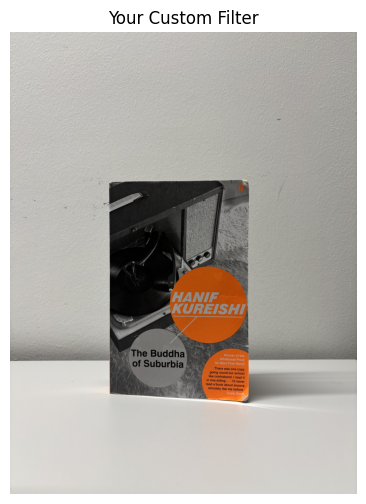

In [31]:
# TODO: Create your own custom kernel
# Hint: Try different values and see what happens!
custom_kernel = np.array([[0, 0, 0],
                          [0, 1, 0],
                          [0, 0, 0]])

custom_filtered = cv2.filter2D(test_image, -1, custom_kernel)
display_image(custom_filtered, "Your Custom Filter")

---
# Part 2: Image Transformations

## What are Transformations?

Transformations modify the **geometry** of an image:
- **Translation** - Moving the image
- **Rotation** - Rotating around a point
- **Scaling** - Resizing (zooming in/out)
- **Affine** - Combinations of the above

These are crucial for:
- Image alignment
- Data augmentation in machine learning
- Correcting camera perspectives

## 2.1 Translation (Moving)

Shift an image horizontally and/or vertically.

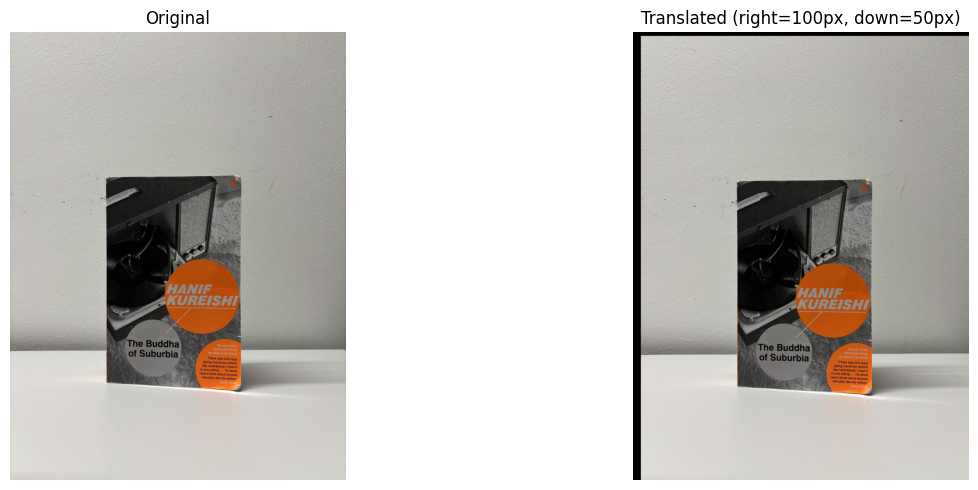

In [32]:
# Translation matrix: [1, 0, tx], [0, 1, ty]
# tx = pixels to move right, ty = pixels to move down
tx, ty = 100, 50
translation_matrix = np.float32([[1, 0, tx],
                                  [0, 1, ty]])

# Apply translation
height, width = test_image.shape[:2]
translated = cv2.warpAffine(test_image, translation_matrix, (width, height))

display_images_side_by_side(
    [test_image, translated],
    ['Original', f'Translated (right={tx}px, down={ty}px)']
)

## 2.2 Rotation

Rotate an image around a center point.

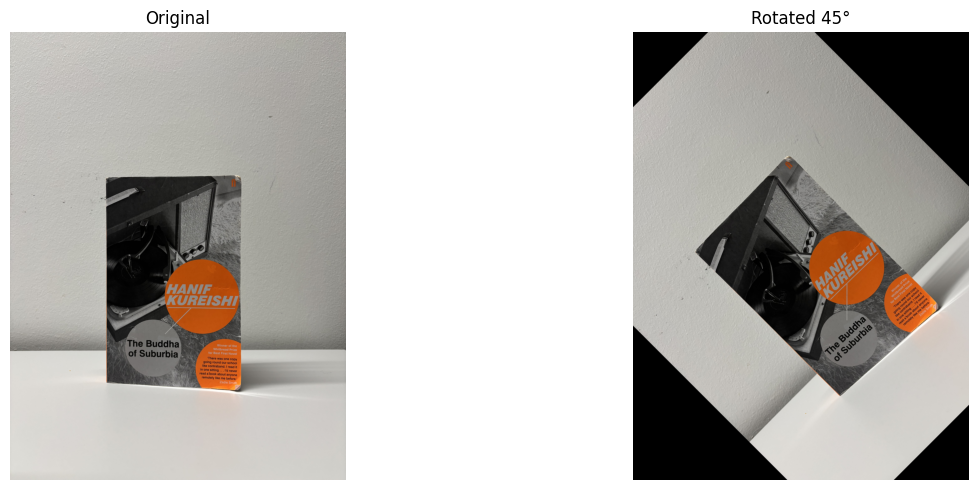

In [33]:
# Get image dimensions
height, width = test_image.shape[:2]
center = (width // 2, height // 2)

# Rotation angle (degrees)
angle = 45

# Get rotation matrix
rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale=1.0)

# Apply rotation
rotated = cv2.warpAffine(test_image, rotation_matrix, (width, height))

display_images_side_by_side(
    [test_image, rotated],
    ['Original', f'Rotated {angle}°']
)

## 2.3 Scaling (Resizing)

Make images larger or smaller.

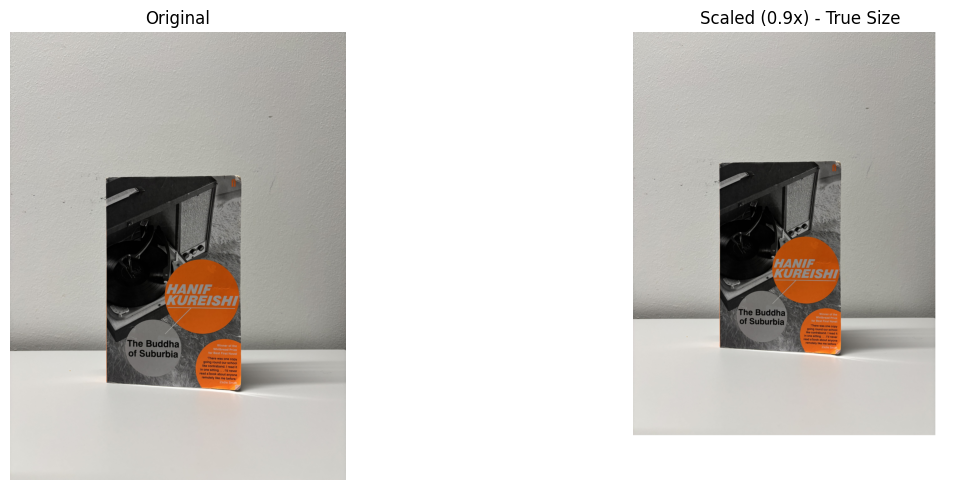

Original size: 4284x5712
Scaled size: 3855x5140
Pixels reduced by: 19.0%


In [ ]:
# Scale factor (0.5 = 50% size)
scale_factor = 0.9

# Calculate new dimensions
new_width = int(width * scale_factor)
new_height = int(height * scale_factor)

# Resize the image
scaled = cv2.resize(test_image, (new_width, new_height))

# Create a blank canvas and place scaled image in corner to show true size
canvas = np.ones_like(test_image) * 255  # White background
canvas[0:new_height, 0:new_width] = scaled

display_images_side_by_side(
    [test_image, canvas],
    ['Original', f'Scaled ({scale_factor}x) - True Size']
)

print(f"Original size: {width}x{height}")
print(f"Scaled size: {new_width}x{new_height}")
print(f"Pixels reduced by: {100 - (new_width*new_height)/(width*height)*100:.1f}%")

### Exercise 2: Combine Transformations

Try combining rotation and scaling!

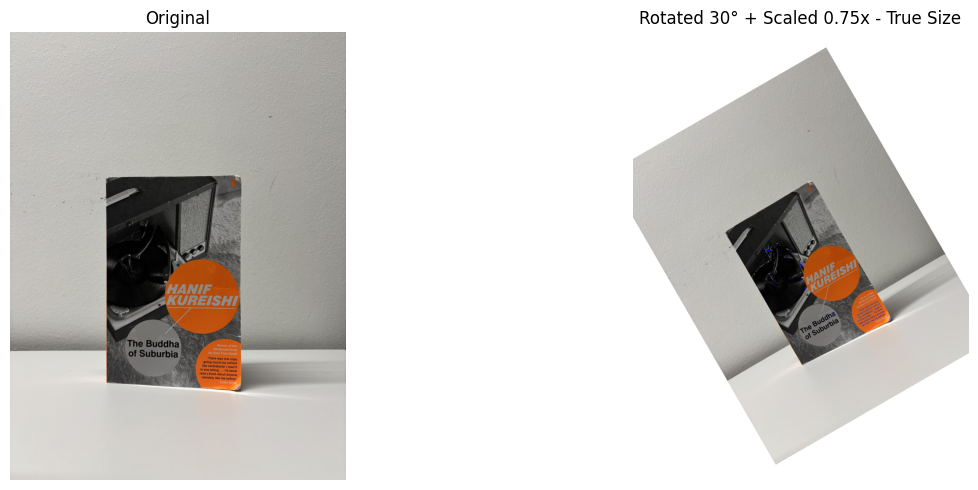

Original size: 4284x5712
Rotation: 30°
Scale factor: 0.75x


In [ ]:
# TODO: Rotate the image by 30 degrees AND scale it to 75% size
# Hint: Use scale parameter in getRotationMatrix2D

your_angle = 30
your_scale = 0.75

# Your code here:
combined_matrix = cv2.getRotationMatrix2D(center, your_angle, your_scale)
combined_transform = cv2.warpAffine(test_image, combined_matrix, (width, height))

# Create a blank canvas to show true size
canvas = np.ones_like(test_image) * 255  # White background
# Place the transformed image on the canvas (it will show at actual scaled size)
mask = combined_transform > 0
canvas[mask] = combined_transform[mask]

display_images_side_by_side(
    [test_image, canvas],
    ['Original', f'Rotated {your_angle}° + Scaled {your_scale}x - True Size']
)

print(f"Original size: {width}x{height}")
print(f"Rotation: {your_angle}°")
print(f"Scale factor: {your_scale}x")


## TODO: Try combinging transofrms in different orders!
# Hint: Order of operations matters! Try translate -> rotate -> scale vs scale -> rotate ->

---
# Part 3: Edge Detection

## What is Edge Detection?

Edge detection finds **boundaries** in images where there are rapid changes in intensity or color. Edges reveal:
- Object boundaries
- Shape information
- Textures and patterns

### Applications:
- Object recognition
- Lane detection in self-driving cars
- Medical imaging
- Document scanning

## 3.1 Sobel Edge Detection

Sobel detects edges by computing the gradient (rate of change) in x and y directions.

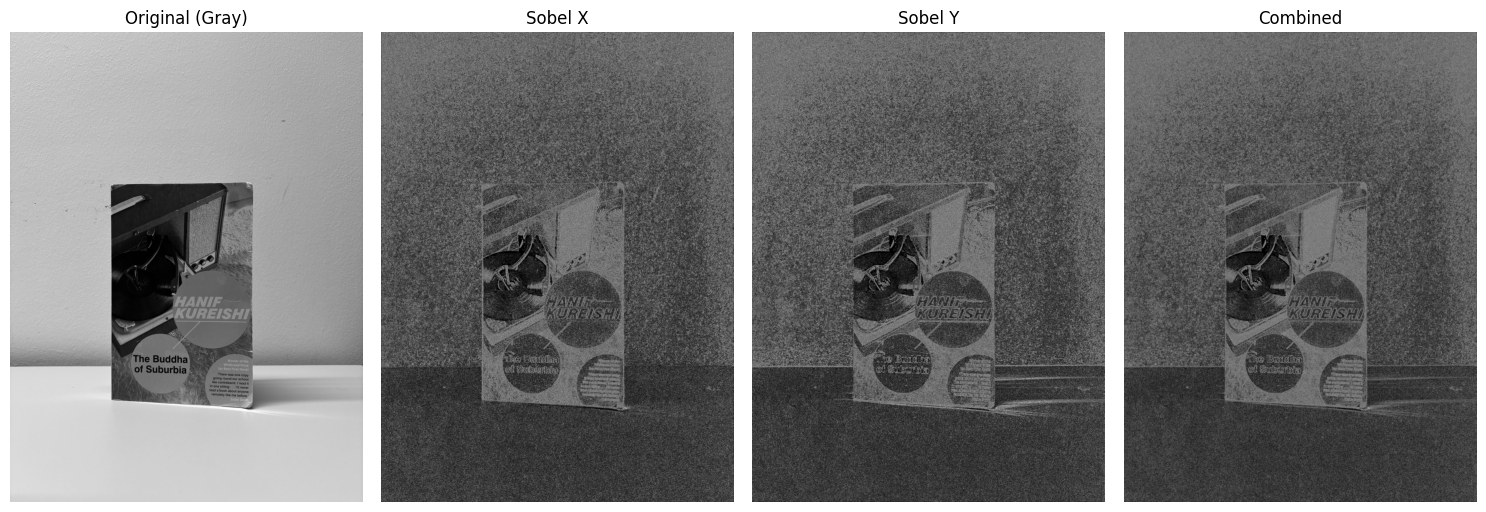

In [36]:
# Convert to grayscale (edge detection works on intensity)
gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)

# Apply Sobel in X direction
sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5)
sobel_x = np.uint8(np.absolute(sobel_x))

# Apply Sobel in Y direction
sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=5)
sobel_y = np.uint8(np.absolute(sobel_y))

# Combine both directions
sobel_combined = cv2.addWeighted(sobel_x, 0.5, sobel_y, 0.5, 0)

display_images_side_by_side(
    [gray, sobel_x, sobel_y, sobel_combined],
    ['Original (Gray)', 'Sobel X', 'Sobel Y', 'Combined']
)

## 3.2 Canny Edge Detection

Canny is one of the most popular edge detectors. It's more sophisticated and produces cleaner edges.

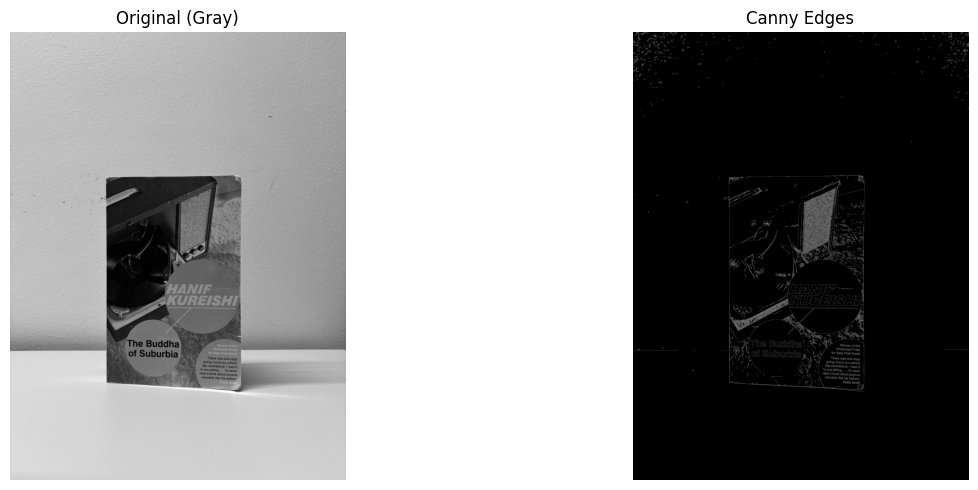

Thresholds: Low=50, High=150


In [37]:
# Canny parameters: lower threshold, upper threshold
# Pixels with gradient > upper are edges
# Pixels between lower and upper are edges if connected to strong edges

low_threshold = 50
high_threshold = 150

# Apply Canny edge detection
canny_edges = cv2.Canny(gray, low_threshold, high_threshold)

display_images_side_by_side(
    [gray, canny_edges],
    ['Original (Gray)', 'Canny Edges']
)

print(f"Thresholds: Low={low_threshold}, High={high_threshold}")

### Exercise 3: Tune the Canny Detector

Try different threshold values and see how they affect edge detection!

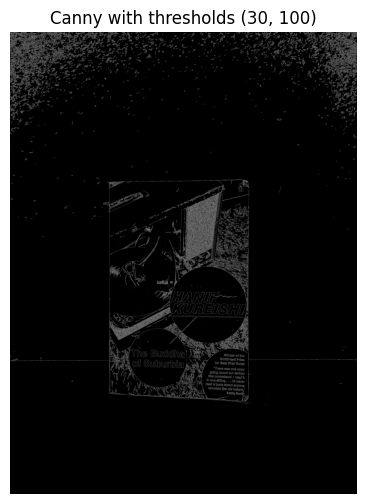

In [38]:
# TODO: Experiment with different threshold values
# Try: (10, 50), (100, 200), (20, 100)

your_low = 30
your_high = 100

your_edges = cv2.Canny(gray, your_low, your_high)
display_image(your_edges, f"Canny with thresholds ({your_low}, {your_high})")

## 3.3 Laplacian Edge Detection

Laplacian detects edges by computing the second derivative of the image.

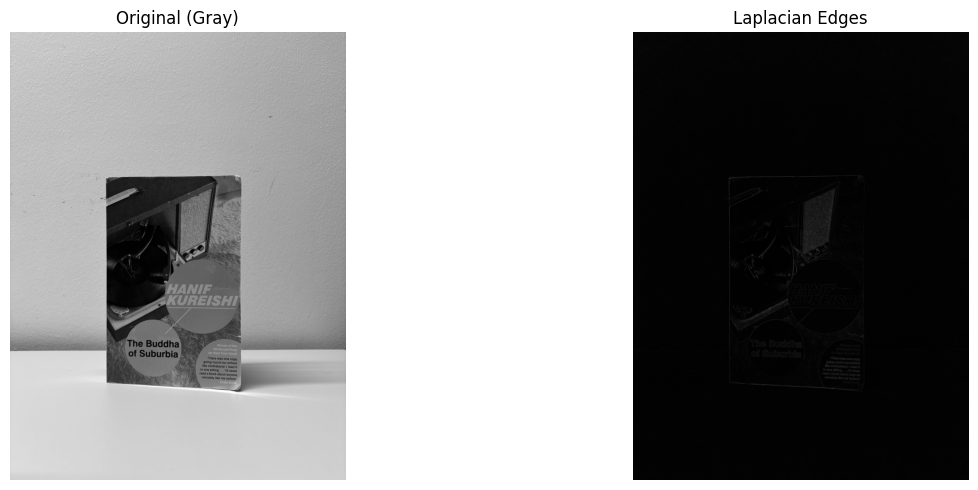

In [39]:
# Apply Laplacian
laplacian = cv2.Laplacian(gray, cv2.CV_64F)
laplacian = np.uint8(np.absolute(laplacian))

display_images_side_by_side(
    [gray, laplacian],
    ['Original (Gray)', 'Laplacian Edges']
)

---
# Part 4: Back Pressure in Real-Time Systems

## What is Back Pressure?

**Back pressure** occurs when a system receives data faster than it can process it. Think of it like:
- A pipe that's too narrow for the water flow
- A traffic jam on a highway
- Your inbox filling up faster than you can read emails

### Why It Matters:
In robotics and real-time systems:
- Cameras capture frames at 30-60 FPS
- Processing might only handle 10 FPS
- Without back pressure handling, the system can **crash** or become **unresponsive**

### Solutions:
1. **Buffering** - Store data temporarily
2. **Dropping frames** - Skip some data
3. **Throttling** - Slow down the producer
4. **Parallel processing** - Use multiple processors

## 4.1 Simulating Back Pressure

Let's simulate a camera producing frames faster than our processor can handle.

In [96]:
class VideoProcessor:
    """Simulates a video processing pipeline with back pressure."""
    
    def __init__(self, buffer_size=10):
        self.buffer = deque(maxlen=buffer_size)
        self.frames_received = 0
        self.frames_processed = 0
        self.frames_dropped = 0
    
    def receive_frame(self, frame):
        """Simulates receiving a frame from a camera."""
        self.frames_received += 1
        
        if len(self.buffer) >= self.buffer.maxlen:
            self.buffer.popleft()
            self.frames_dropped += 1
        
        self.buffer.append(frame)
    
    def process_frame(self):
        """Simulates processing a frame (slow operation)."""
        if not self.buffer:
            return None
        
        frame = self.buffer.popleft()
        self.frames_processed += 1
        
        # Simulate expensive processing
        time.sleep(0.1)  # Processing takes 100ms
        
        # Apply edge detection as our "processing"
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        edges = cv2.Canny(gray, 50, 150)
        
        return edges
    
    def get_stats(self):
        """Get processing statistics."""
        if len(self.buffer) > 0:
            # Get size of one frame and multiply by buffer length
            frame_size_kb = self.buffer[0].nbytes / 1024
            buffer_memory = frame_size_kb * len(self.buffer)
        else:
            buffer_memory = 0
        
        return {
            'received': self.frames_received,
            'processed': self.frames_processed,
            'dropped': self.frames_dropped,
            'buffer_size': len(self.buffer),
            'drop_rate': f"{(self.frames_dropped / max(self.frames_received, 1) * 100):.1f}%",
            'buffer_memory_kb': f"{buffer_memory:.1f} KB"
        }

print("VideoProcessor class defined!")

VideoProcessor class defined!


In [ ]:
# TODO: Create a processor with a larger buffer and compare results
# What buffer size minimizes drops without using too much memory, try varying sizes and frame rates?

import threading

def simulate_camera(processor, frame, fps, duration_sec):
    """Simulate camera producing frames at specified FPS"""
    frame_interval = 1.0 / fps
    start_time = time.time()
    frames_sent = 0
    
    while time.time() - start_time < duration_sec:
        processor.receive_frame(frame)
        frames_sent += 1
        time.sleep(frame_interval)
    
    return frames_sent

# Create processor
processor = VideoProcessor(buffer_size=10)

camera_fps = 30  # Try changing this: 15, 30, 60
duration = 1.0  # 1 second of footage

print(f"Simulating camera at {camera_fps} FPS...\n")
camera_thread = threading.Thread(
    target=simulate_camera, 
    args=(processor, test_image, camera_fps, duration)
)
camera_thread.start()

# Process frames as fast as possible (but slower than capture)
while camera_thread.is_alive():
    processor.process_frame()

camera_thread.join()

print("Processing Statistics:")
stats = processor.get_stats()
for key, value in stats.items():
    print(f"  {key}: {value}")

print(f"\nCamera FPS: {camera_fps}")
print(f"Expected frames at {camera_fps} FPS over {duration}s: ~{camera_fps * duration}")
print("\n Notice: We might have dropped some frames if processing was slower than capture!")

Simulating camera at 30 FPS...

Processing Statistics:
  received: 28
  processed: 8
  dropped: 10
  buffer_size: 10
  drop_rate: 35.7%
  buffer_memory_kb: 716900.6 KB

Camera FPS: 30
Expected frames at 30 FPS over 1.0s: ~30.0

 Notice: We dropped some frames because processing was slower than capture!


---
# Part 5: Telemetry - Monitoring Your System

## What is Telemetry?

**Telemetry** is the automatic collection and transmission of data from remote sources. In robotics:
- Monitor robot health (temperature, battery, errors)
- Track performance (FPS, processing time, latency)
- Debug issues remotely
- Optimize algorithms

Think of it like a car's dashboard showing:
- Speed (FPS)
- Fuel (battery)
- Engine temperature (CPU temp)
- Warning lights (errors)

## 5.1 Creating a Telemetry System

Let's build a simple telemetry collector for our vision system.

In [100]:
class VisionTelemetry:
    """Collects and monitors vision system telemetry."""
    
    def __init__(self):
        self.metrics = {
            'fps_history': deque(maxlen=100),
            'processing_time_history': deque(maxlen=100),
            'frame_count': 0,
            'error_count': 0,
            'start_time': time.time()
        }
    
    def record_frame_processing(self, processing_time):
        """Record metrics for a processed frame."""
        self.metrics['frame_count'] += 1
        self.metrics['processing_time_history'].append(processing_time)
        
        # Calculate FPS
        if processing_time > 0:
            fps = 1.0 / processing_time
            self.metrics['fps_history'].append(fps)
    
    def record_error(self):
        """Record an error occurrence."""
        self.metrics['error_count'] += 1
    
    def get_current_stats(self):
        """Get current telemetry statistics."""
        if not self.metrics['fps_history']:
            return {}
        
        uptime = time.time() - self.metrics['start_time']
        
        return {
            'frames_processed': self.metrics['frame_count'],
            'current_fps': self.metrics['fps_history'][-1],
            'avg_fps': np.mean(self.metrics['fps_history']),
            'avg_processing_time_ms': np.mean(self.metrics['processing_time_history']) * 1000,
            'errors': self.metrics['error_count'],
            'uptime_seconds': uptime
        }
    
    def plot_performance(self):
        """Visualize performance metrics over time."""
        if not self.metrics['fps_history']:
            print("No data to plot yet!")
            return
        
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
        
        # FPS over time
        ax1.plot(list(self.metrics['fps_history']), color='blue', linewidth=2)
        ax1.set_title('Frames Per Second (FPS) Over Time')
        ax1.set_xlabel('Frame Number')
        ax1.set_ylabel('FPS')
        ax1.grid(True, alpha=0.3)
        ax1.axhline(y=np.mean(self.metrics['fps_history']), 
                    color='r', linestyle='--', label='Average FPS')
        ax1.legend()
        
        # Processing time over time
        processing_times_ms = [t * 1000 for t in self.metrics['processing_time_history']]
        ax2.plot(processing_times_ms, color='green', linewidth=2)
        ax2.set_title('Processing Time Over Time')
        ax2.set_xlabel('Frame Number')
        ax2.set_ylabel('Processing Time (ms)')
        ax2.grid(True, alpha=0.3)
        ax2.axhline(y=np.mean(processing_times_ms), 
                    color='r', linestyle='--', label='Average Time')
        ax2.legend()
        
        plt.tight_layout()
        plt.show()

print("✓ VisionTelemetry class defined!")

✓ VisionTelemetry class defined!


## 5.2 Running a Telemetry-Enabled Vision Pipeline

In [101]:
# Create telemetry system
telemetry = VisionTelemetry()

# Simulate processing 50 frames
print("Processing frames with telemetry...\n")

for i in range(50):
    start_time = time.time()
    
    try:
        # Simulate varying processing load
        gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
        
        # Apply filters (varies processing time)
        if i % 3 == 0:
            result = cv2.GaussianBlur(gray, (9, 9), 0)
        else:
            result = cv2.Canny(gray, 50, 150)
        
        # Simulate network latency or other delays occasionally
        if i % 10 == 0:
            time.sleep(0.05)
        
    except Exception as e:
        telemetry.record_error()
        continue
    
    # Record processing time
    processing_time = time.time() - start_time
    telemetry.record_frame_processing(processing_time)
    
    # Print status every 10 frames
    if (i + 1) % 10 == 0:
        stats = telemetry.get_current_stats()
        print(f"Frame {i+1}: {stats['current_fps']:.1f} FPS | "
              f"Avg: {stats['avg_fps']:.1f} FPS | "
              f"Processing: {stats['avg_processing_time_ms']:.2f}ms")

print("\n" + "="*60)
print("FINAL STATISTICS")
print("="*60)
final_stats = telemetry.get_current_stats()
for key, value in final_stats.items():
    if isinstance(value, float):
        print(f"{key}: {value:.2f}")
    else:
        print(f"{key}: {value}")

Processing frames with telemetry...

Frame 10: 48.6 FPS | Avg: 40.9 FPS | Processing: 43.45ms
Frame 20: 27.1 FPS | Avg: 46.9 FPS | Processing: 34.92ms
Frame 30: 34.6 FPS | Avg: 48.1 FPS | Processing: 31.74ms
Frame 40: 50.5 FPS | Avg: 49.2 FPS | Processing: 29.77ms
Frame 50: 54.5 FPS | Avg: 52.1 FPS | Processing: 28.17ms

FINAL STATISTICS
frames_processed: 50
current_fps: 54.48
avg_fps: 52.12
avg_processing_time_ms: 28.17
errors: 0
uptime_seconds: 1.43


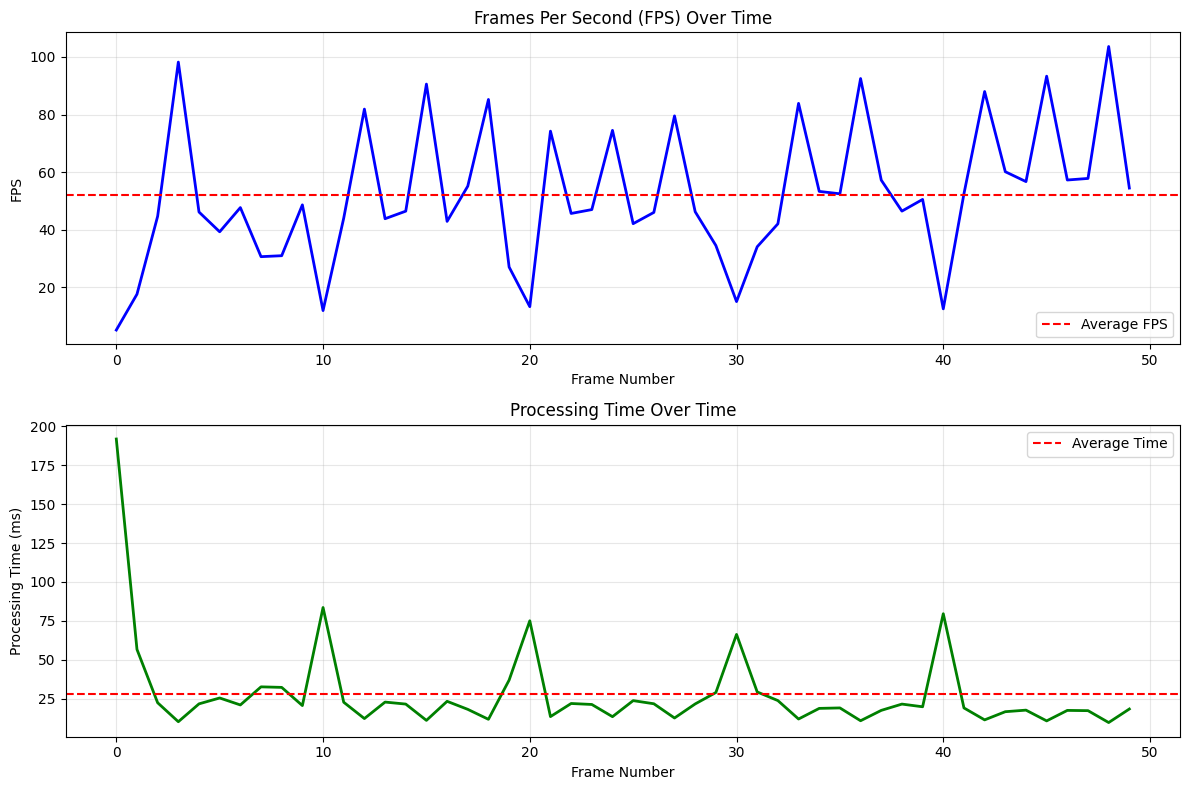

In [102]:
# Visualize performance metrics
telemetry.plot_performance()

### Understanding the Telemetry Data

From the graphs, you can see:
- **FPS variations**: Spikes indicate faster processing, dips show slower frames
- **Processing time**: Higher values indicate bottlenecks or complex operations
- **Patterns**: Regular spikes might indicate periodic tasks (like network updates)

In a real system:
- You'd monitor this in real-time
- Set up alerts for abnormal values
- Log data for post-mission analysis

If you are interested take a look at OTel [https://opentelemetry.io/], Grafana [https://grafana.com/] and Prometheus [https://prometheus.io/].

---
# Final Challenge: Build a Complete Vision Pipeline

Now that you've learned all the concepts, let's combine them into a complete system!

In [106]:
class SmartVisionPipeline:
    """Complete vision pipeline with filtering, edge detection, and telemetry."""
    
    def __init__(self, buffer_size=10):
        self.processor = VideoProcessor(buffer_size)
        self.telemetry = VisionTelemetry()
    
    def process_frame(self, frame):
        """Process a single frame through the entire pipeline."""
        start_time = time.time()
        
        try:
            # Step 1: Receive frame
            self.processor.receive_frame(frame)
            
            # Step 2: Pre-processing (noise reduction)
            denoised = cv2.GaussianBlur(frame, (5, 5), 0)
            
            # Step 3: Convert to grayscale
            gray = cv2.cvtColor(denoised, cv2.COLOR_BGR2GRAY)
            
            # Step 4: Edge detection
            edges = cv2.Canny(gray, 50, 150)
            
            # Step 5: Record telemetry
            processing_time = time.time() - start_time
            self.telemetry.record_frame_processing(processing_time)
            
            return edges
            
        except Exception as e:
            self.telemetry.record_error()
            return None
    
    def get_stats(self):
        """Get combined statistics."""
        return {
            'processor': self.processor.get_stats(),
            'telemetry': self.telemetry.get_current_stats()
        }

print("SmartVisionPipeline class defined!")

SmartVisionPipeline class defined!


### Exercise 5: Test Your Pipeline

Run the complete pipeline and analyze its performance!

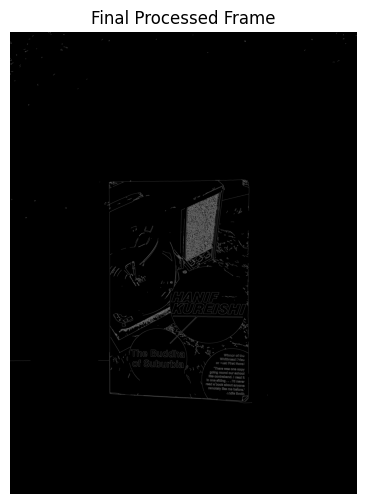


Pipeline Statistics:

Processor:
  received: 30
  processed: 0
  dropped: 20
  buffer_size: 10
  drop_rate: 66.7%
  buffer_memory_kb: 716900.6 KB

Telemetry:
  frames_processed: 30
  current_fps: 37.92
  avg_fps: 30.78
  avg_processing_time_ms: 40.36
  errors: 0
  uptime_seconds: 5.13


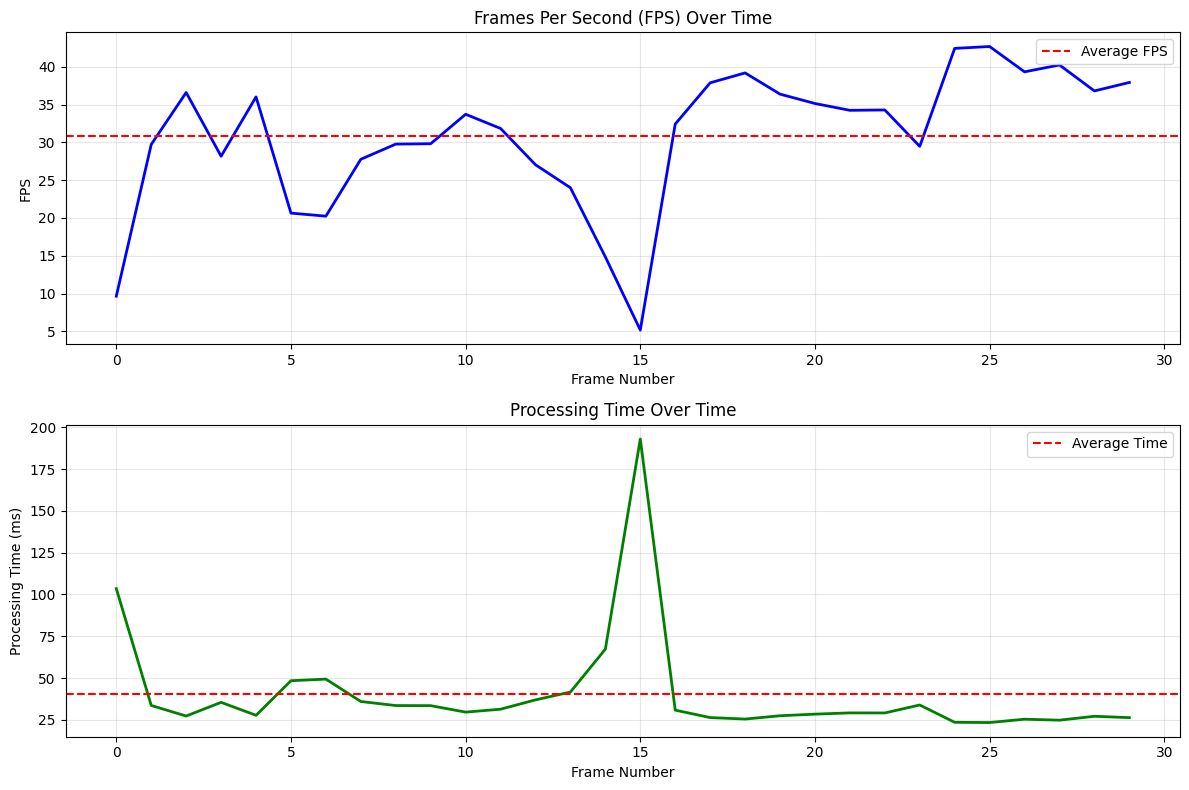

In [107]:
# TODO: Create your pipeline and process frames
pipeline = SmartVisionPipeline(buffer_size=10)

# Process multiple frames
results = []
for i in range(30):
    result = pipeline.process_frame(test_image)
    if result is not None:
        results.append(result)
    time.sleep(0.033)  # Simulate 30 FPS camera

# Display results
if results:
    display_image(results[-1], "Final Processed Frame")

# Show statistics
stats = pipeline.get_stats()
print("\nPipeline Statistics:")
print("\nProcessor:")
for key, value in stats['processor'].items():
    print(f"  {key}: {value}")
print("\nTelemetry:")
for key, value in stats['telemetry'].items():
    if isinstance(value, float):
        print(f"  {key}: {value:.2f}")
    else:
        print(f"  {key}: {value}")

# Plot performance
pipeline.telemetry.plot_performance()

---
Congratulations! You've learned some of the fundamentals of computer vision and real-time data processing.

## Resources
- [OpenCV Documentation](https://docs.opencv.org/)
- [Computer Vision: Algorithms and Applications](http://szeliski.org/Book/)
- [Real-Time Image Processing](https://en.wikipedia.org/wiki/Real-time_computer_graphics)
